### Regeln
Die Simulation findet auf einem unendlichen 2D Raster statt. Jedes Feld ist eine Zelle, die entweder am leben oder tod sein kann.

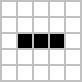

Eine Zelle hat 8 Nachbarzellen:

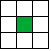

Jede Generation (Runde) ändert sich der Zustand der Felder auf der Basis von vier Regeln:

1. Eine tote Zelle mit mit genau drei lebenden Nachbarn wird in der nächsten Generation "geboren".
2. Eine lebende Zelle mit weniger als zwei lebenden Nachbarn "stirbt" in der nächsten Generation.
3. Eine lebende Zelle mit zwei oder drei lebenden Nachbarn bleibt am leben.
4. Eine lebende Zelle mit mehr als drei lebenden Nachbarn stirbt in der nächsten Generation.


### Beispiele
#### Absterben
###### 1. Generation 
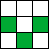
###### 2. Generation 
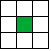
###### 3. Generation 
?
### Blinker
###### 1. Generation
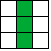
###### 2. Generation 
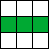
###### 3. Generation
?
###### 11. Generation
?
#### Gleiter

###### 1. Generation
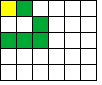
###### 2. Generation
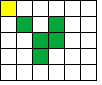
###### 3. Generation
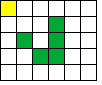
######  4. Generation
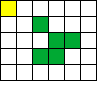


# Optimierung des Programms
Unser Programm ist aktuell eher ineffizient.

### Was ist Effizienz?
- Geschwindigkeit
- Speicherplatznutzen

Wenn zwei Programme das gleiche Ziel erreichen und das eine schneller ist oder weniger Speicherplatz braucht, ist dieses Programm effizienter.

### Speicherplatz
Um den Speicherplatznutzen zu reduzieren, können wir `numpy` benutzen.

`numpy` ist eine Bibliothek, die es dir erlaubt Listen (`Arrays`) zu erstellen. Diese Arrays sind begrenzter als Standardlisten, da einem Array keine neuen Elemente hinzugefügt werden können und alle Elemente eines Arrays den gleichen Datentyp haben müssen.

In [30]:
import numpy as np

x = np.array([ [1,2,3]
             , [4,5,6]
             ], dtype=np.int)

print(x.size)
print(x.shape)
print(x.dtype)

6
(2, 3)
int64


##### Was ist `size`?
##### Was ist `shape`?
##### Was ist `dtype`?


### Was kann `numpy`?

#### Rechnen mit Arrays
Mit `numpy` Arrays kannst du rechnen, als wären es Zahlen.

Alle Operationen werden auf den korrespondierenden Elementen der Arrays ausgeführt und ein neues Array aus den Ergebnissen erstellt.

In [31]:
y = np.array([ [1, 1, 2]
             , [2, 5, 1]
             ], dtype=np.int)

print("X: ")
print(x)
print("Y: ")
print(y)
print("X+Y = ")
print(x+y)
print("X*Y = ")
print(x*y)
print("X/Y = ")
print(x/y)

X: 
[[1 2 3]
 [4 5 6]]
Y: 
[[1 1 2]
 [2 5 1]]
X+Y = 
[[ 2  3  5]
 [ 6 10  7]]
X*Y = 
[[ 1  2  6]
 [ 8 25  6]]
X/Y = 
[[1.  2.  1.5]
 [2.  1.  6. ]]
[[   1    2    9]
 [  16 3125    6]]


#### Schnell neue Arrays erstellen
`numpy` hat mehrere Funktionen um schnell Arrays mit unterschiedlichen Größen (Dimensionen) zu erstellen.

- `np.zeros` erstellt ein Array mit Nullen (oder dem äquivalenten Werten für den Datentype)
- `np.ones` erstellt ein Array mit Einsen


In [4]:
a = np.zeros((10**6,3), dtype=np.int)
b = np.ones((10**6,3), dtype=np.int)

print(5*b)
print(b)


[[5 5 5]
 [5 5 5]
 [5 5 5]
 ...
 [5 5 5]
 [5 5 5]
 [5 5 5]]
[[1 1 1]
 [1 1 1]
 [1 1 1]
 ...
 [1 1 1]
 [1 1 1]
 [1 1 1]]


## Was kann `numpy` nicht?

- Arrays können nicht vergrößert werden. (Kein `append`)
- Arrays haben immer nur Werte eines Datentypes. (Kein `[True, 1, "Hello, World"]`)

### Game of Life mit `numpy` Arrays

Bisher haben wir als Spielfeld eine 2-dimensionale Liste benutzt. Lass uns diese durch ein numpy 2d-Array ersetzen.


Als Aufgabe: Implementiere `run(generation)` so, dass die Funktion ein zwei-dimensionales `numpy` Array anstatt einer zwei-dimensionalen `list` als Argument nimmt und zurückgibt.

In [9]:
blinker = np.array(
          [[False, True, False], 
           [False, True, False],
           [False, True, False]
          ], dtype = np.bool)

def neighbors(gen,x,y):
    diffs = [-1, 0, 1]
    n = 0
    
    for x_diff in diffs:
        for y_diff in diffs:
            x_pos = x + x_diff
            y_pos = y + y_diff
            
            if x_pos < 0 or x_pos >= len(gen) or y_pos < 0 or y_pos >= len(gen[x]):
                continue
                
            if x == x_pos and y == y_pos:
                continue
                
            n += gen[x_pos][y_pos]

    return n

def run(generation):
    # Generate a new 2d list with the same dimensions as generation
    next_generation = np.zeros(generation.shape, dtype=np.bool)
    for x in range(len(generation)):
        for y in range(len(generation[x])):
            n = neighbors(generation,x,y)
            
            if generation[x][y]:
                if n < 2 or n > 3:
                    next_generation[x][y] = False
                else:
                    next_generation[x][y] = True
            else:
                if n == 3:
                    next_generation[x][y] = True
            
            
    return next_generation

In [ ]:
block_ = run(block)

print(block_)

assert np.array_equal(block, block_)

### Parallelisierung

Bisher haben wir Programme geschrieben, die eine Reihe von Befehlen nacheinander ausführen.

Aber natürlich kann ein Programm auch mehrere Dinge nebeneinander ausführen. Diese Technik nennt sich "Parallelisierung".

Indem wir mehrere Rechnungen gleichzeitig ausführen, können wir ein Programme beschleunigen.

#### Wie können wir es nutzen?
Bei Conway's Game of Life, ist der Zustand jeder Zelle immer nur von der vorherigen Runde abhängig.

Daher können wir den Zustand der einzelnen Zellen in einer Generation parallel zueinander. Aber wir können nicht gleichzeitig mehrere Generationen berechnen. Eine Generation hängt immer von ihrem Vorgänger ab.

##### `multiprocessing`
- Bibliothek zum parallelen Ausführen von Funktionen
- Enhält `Pool`, eine Funktion mit der du mehrere eine Funktion parallel mit unterschiedlichen Argumenten ausführen kann.

In [9]:
from multiprocessing import Pool

def f(x):
    return x*x

with Pool(5) as p:
    print(p.map(f, [5, 3, 2]))


[25, 9, 4]


`p.map` nimmt eine Funktion (`f`) und eine liste von Argumenten. Wenn die Funktion mehrere Argumente nimmt, kannst du einen Tuple übergeben.

In [13]:
def g(args):
    return args[0]+args[1]

with Pool(5) as p:
    print(p.map(g, [(4,3),(2,1)]))


[7, 3]


#### Geteilter Zustand
Wenn wir einem Prozess einen Wert als Argument gibt, erhält er eine Kopie dieses Werts.

Um Werte zwischen Prozessen zu teilen, ohne sie ständig kopieren, müssen geteilten Zustand einführen.

Bei Conway's Game of Life ist es besser, die vorherige Generation zu geteilten Zustand zu machen, anstatt das Array.  

In [ ]:
from multiprocessing import shared_memory

a = np.zeros((3,3), dtype=np.bool)

shm = shared_memory.SharedMemory(create=True, a.nbytes) # a.nbytes: Bytes to store a in.

b = np.zeros((3,3), dtype=np.bool)


#### Schreibe Conway's Game of Life mit Parallelisierung

Erstelle einen Prozess Pool mit genug Prozessen für jede Zelle
und berechne die nächste Generation parallel.

In [1]:
import numpy as np
blinker = np.array(
          [[False, True, False], 
           [False, True, False],
           [False, True, False]
          ], dtype = np.bool)

def neighbors(gen,x,y):
    diffs = [-1,0,1]
    n = 0
    
    for x_diff in diffs:
        for y_diff in diffs:
            x_pos = x + x_diff
            y_pos = y + y_diff
            
            if x_pos < 0 or x_pos >= len(gen) or y_pos < 0 or y_pos >= len(gen[x]):
                continue
                
            if x == x_pos and y == y_pos:
                continue
                
            n += gen[x_pos][y_pos]

    return n

def calculate_cell(args):
    generation = args[0]
    x = args[1]
    y = args[2]
    
    n = neighbors(generation, x, y)
    
    if generation[x][y]:
        if n < 2 or n > 3:
            return False
        else:
            return True
    else:
        if n == 3:
            return True
        
def run(generation):
    # Generate a new 2d list with the same dimensions as generation
    with Pool(generation.size) as p:
        return np.array(p.map(calculate_cell, [(generation, x, y) for x in range(generation.shape[0]) for y in range(generation.shape[1])]))

NameError: name 'np' is not defined